In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [3]:
df = pd.read_csv("/home/jishnu/Desktop/ML-dataset/housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


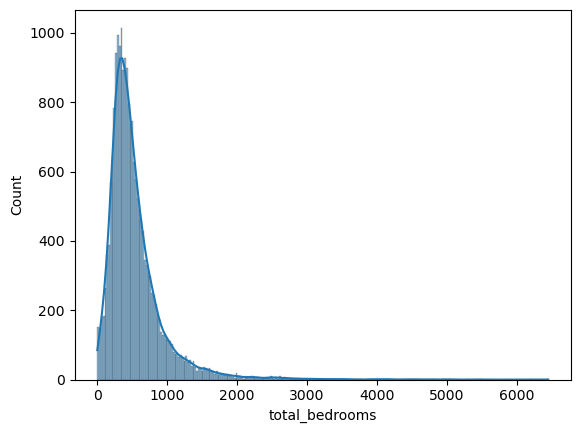

In [7]:
sns.histplot(data = df, x = "total_bedrooms",kde = True)
plt.show()

In [8]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
df.drop("longitude",axis=1, inplace = True)

In [10]:
c1 = df.select_dtypes(["int","float"])

c1.shape

(20640, 8)

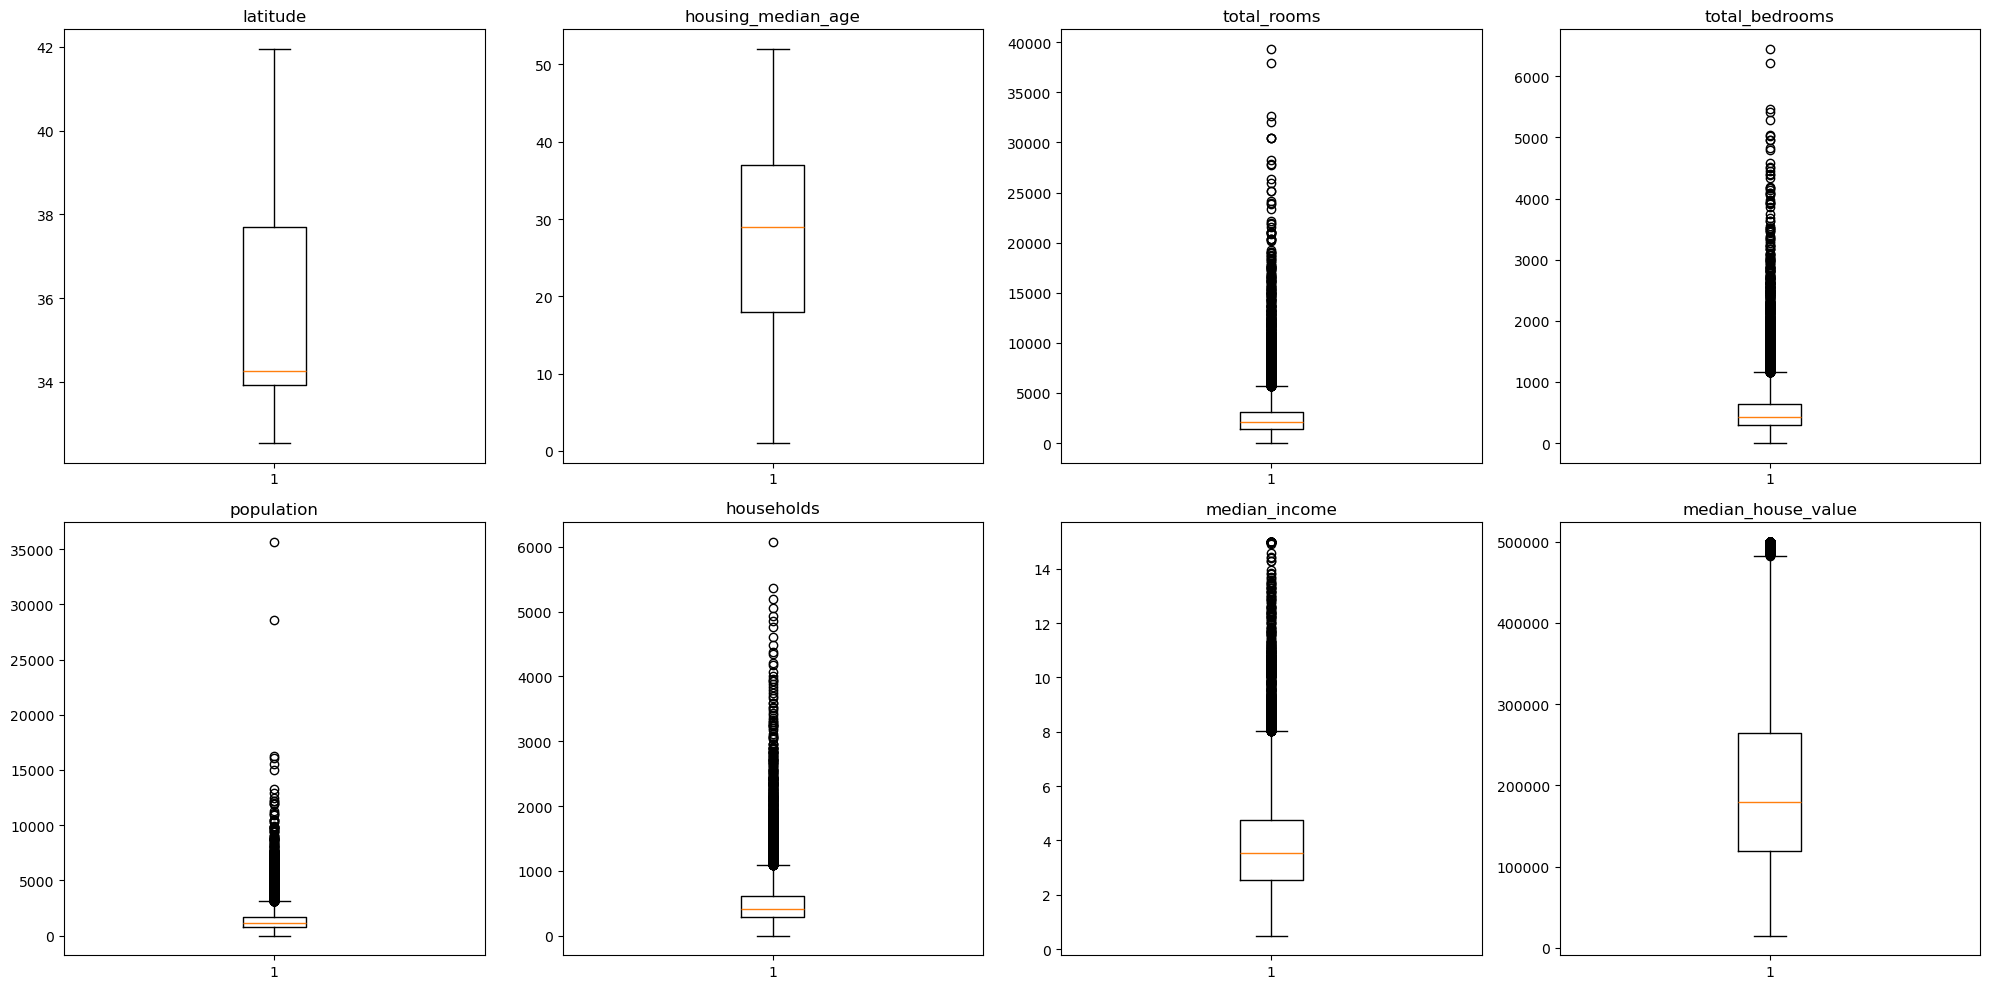

In [11]:
fig,axs = plt.subplots(2,4, figsize = (20,10))

axs = axs.flatten()

for i in range(8):
    axs[i].boxplot(df[c1.columns[i]])
    axs[i].set_title(c1.columns[i])
plt.tight_layout()
plt.show()


In [13]:
df = pd.get_dummies(df,drop_first = True,dtype=int)

In [14]:
df.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [15]:
mm = MinMaxScaler()

In [16]:
c2 = ["latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income",]

df[c2] = mm.fit_transform(df[c2])

In [17]:
df.describe()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.328572,0.541951,0.066986,0.083153,0.039869,0.081983,0.232464,206855.816909,0.317393,0.000242,0.110950,0.128779
std,0.226988,0.246776,0.055486,0.065083,0.031740,0.062873,0.131020,115395.615874,0.465473,0.015563,0.314077,0.334963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,0.142308,119600.000000,0.000000,0.000000,0.000000,0.000000
50%,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,0.292641,264725.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
x = df.drop("median_house_value",axis=1)
y = df[["median_house_value"]]

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25, random_state = 42)

In [20]:
x_train

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8158,0.134963,0.705882,0.045679,0.051210,0.024020,0.055747,0.256162,0,0,0,0
18368,0.490967,0.803922,0.064373,0.067039,0.026738,0.065285,0.334264,0,0,0,0
19197,0.628055,0.686275,0.049367,0.052142,0.019844,0.052130,0.235804,0,0,0,0
3746,0.172157,0.607843,0.077776,0.078212,0.032400,0.083703,0.404850,0,0,0,0
13073,0.640808,0.313725,0.041177,0.054159,0.019703,0.055419,0.128860,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11284,0.131775,0.666667,0.033776,0.031037,0.018358,0.035520,0.404829,0,0,0,0
11964,0.157279,0.627451,0.078386,0.088299,0.049048,0.073672,0.175867,1,0,0,0
5390,0.158342,0.686275,0.053385,0.088144,0.049133,0.086499,0.167894,0,0,0,0
860,0.535600,0.274510,0.090874,0.092489,0.049721,0.091761,0.359947,0,0,0,0


In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [28]:
model = lr.fit(x_train,y_train)

In [29]:
y_predict = model.predict(x_test)

In [30]:
y_predict

array([[ 55416.42930135],
       [ 95066.82674085],
       [261976.77158067],
       ...,
       [142894.44994511],
       [254916.55408055],
       [347941.63216238]])

In [31]:
y_test

,median_house_value
20046,47700.0
3024,45800.0
15663,500001.0
20484,218600.0
9814,278000.0
...,...
5363,500001.0
19755,63200.0
4885,117700.0
13043,263100.0


In [32]:
from sklearn.metrics import r2_score

print(f"r2score = {r2_score(y_test,y_predict)}")

r2score = 0.6282819412375915
